In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(1)$$\begin{equation}
\Phi _{M} (R,z) = -\frac{GM}{\sqrt{R^{2} + (a + \sqrt{z^2 + b^2})^{2}}}
\end{equation}$$

(2)$$\begin{equation}
\rho _{M} (R,z) = \frac{b^{2}M}{4\pi} \frac{aR^{2} + (a + 3\sqrt{z^{2} + b^{2}})(a+ \sqrt{z^{2} + b^{2}})^{2}}{(R^{2} + (a + \sqrt{z^2 + b^2})^{2})^{5/2}(z^{2} + b^{2})^{3/2}}
\end{equation}$$

Con  densidades iguales y con $b/a = 0.2$, $b/a = 1.$ y $b/a = 5.$ respectivamente y tomando tanto al potencial como a la densidad de la siguiente forma

(3)$$\begin{equation}
\frac{a\Phi_{M}}{GM} = \frac{-1}{\sqrt{(R/a)^{2} + (1 + \sqrt{(z/a)^{2} + (b/a)^{2}})^{2}}}
\end{equation}$$

(4)$$\begin{equation}
\frac{4\pi \rho_{M} a^{5}}{b^{2}M} = \frac{(R/a)^{2} + (1+3\sqrt{(z/a)^{2} + (b/a)^{2}})(1+\sqrt{(z/a)^{2} + (b/a)^{2}})^{2}}{((R/a)^{2} + (1 + \sqrt{(z/a)^{2} + (b/a)^{2}})^{2})^{5/2}((z/a)^{2} + (b/a)^{2})^{3/2}}
\end{equation}$$

In [2]:
R = np.linspace(-10.,10.,100)
z = np.linspace(-10.,10.,100)

In [23]:
#constantes
G = 4.302e-6 #pcSM(km/s)**2
M = 0.1

In [4]:
#Funcion para calcular el potencial de forma adimensional
def potencial_ad(R,z,ba):
    d = np.sqrt(R**2. + (1. + np.sqrt(z**2. + ba**2.))**2.)
    phi_ad = -1./d
    return phi_ad

In [8]:
def potencial(R,z,ba):
    phi = G*M*potencial_ad(R,z,ba)
    return phi

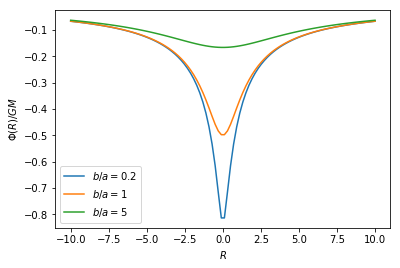

In [6]:
plt.plot(R, potencial_ad(R,z,ba=0.2),label=r'$ b/a = 0.2$')
plt.plot(R, potencial_ad(R,z,ba=1.),label=r'$b/a = 1$')
plt.plot(R, potencial_ad(R,z,ba=5.),label=r'$b/a = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\Phi (R)/GM$')
plt.legend(loc='lower left', prop={'size':10})
plt.show()

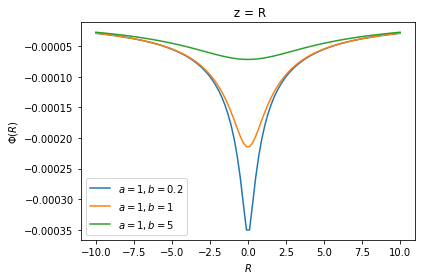

In [9]:
plt.plot(R, potencial(R,z,ba=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, potencial(R,z,ba=1.),label=r'$a = 1, b = 1$')
plt.plot(R, potencial(R,z,ba=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\Phi (R)$')
plt.legend(loc='lower left', prop={'size':10})
plt.title(' z = R')
plt.show()

In [10]:
def densidad_ad(R,z,ba):
    n = R**2. + (1. + 3.*np.sqrt(z**2. + ba**2.))*(1. + np.sqrt(z**2. + ba**2.))**2.
    d = (R**2. + (1. + np.sqrt(z**2. + ba**2.))**2.)**(5./2.) * (z**2. + ba**2.)**(3./2.)
    rho_ad = n/d
    return rho_ad

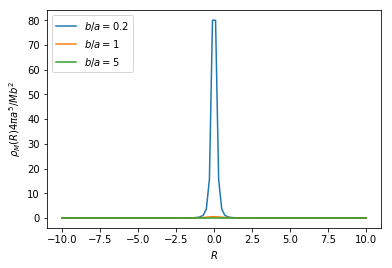

In [11]:
plt.plot(R, densidad_ad(R,z,ba=0.2),label=r'$b/a = 0.2$')
plt.plot(R, densidad_ad(R,z,ba=1.),label=r'$b/a = 1$')
plt.plot(R, densidad_ad(R,z,ba=5.),label=r'$b/a = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{M} (R)4\pi a^{5}/Mb^{2}$')
plt.legend(loc='upper left', prop={'size':10})
#plt.title(' z = R')
plt.show()

In [12]:
def densidad(R,z,ba,a):
    K = (M*ba**2.)/(4.*np.pi*a**3.)
    rho = K*densidad_ad(R,z,ba)
    return rho

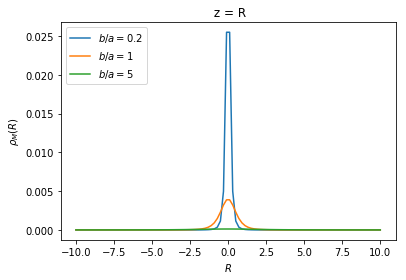

In [13]:
plt.plot(R, densidad(R,z,ba=0.2,a=1.),label=r'$b/a = 0.2$')
plt.plot(R, densidad(R,z,ba=1.,a=1.),label=r'$b/a = 1$')
plt.plot(R, densidad(R,z,ba=5.,a=1.),label=r'$b/a = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{M} (R)$')
plt.legend(loc='upper left', prop={'size':10})
plt.title(' z = R')
plt.show()

In [15]:
R_1,z_1 = np.meshgrid(R,z)

In [16]:
print np.min(densidad_ad(R_1,z_1,ba=0.2)),np.max(densidad_ad(R_1,z_1,ba=0.2))

5.300926999833143e-06 80.01591123474826


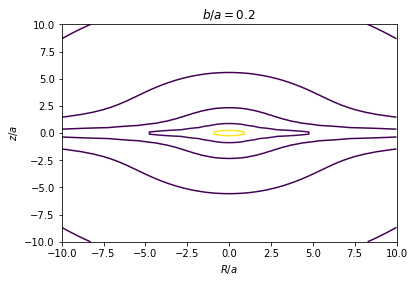

In [19]:
levels=10**np.linspace(np.log10(1.66e-07),np.log10(36.29),6)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_ad(R_1,z_1,ba=0.2),levels=levels)
plt.xlabel(r'$R/a$')
plt.ylabel(r'$z/a$')
plt.title(r'$b/a=0.2$')
#plt.xlim(-6.,6.)
#plt.ylim(-1.,1.)
#plt.colorbar(lm)
plt.savefig('Miyamoto-NagaiEquipotentialb02.pdf')

In [62]:
print np.min(densidad_ad(R_1,z_1,ba=1.)),np.max(densidad_ad(R_1,z_1,ba=1.))

1.6582901213744985e-07 0.45353697560815137


In [63]:
print len(np.arange(1.65e-07,0.45,0.05))

9


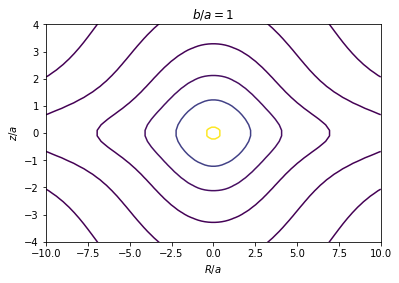

In [21]:
levels=10**np.linspace(np.log10(1.65e-07),np.log10(0.45),10)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_ad(R_1,z_1,ba=1.),levels=levels)
plt.xlabel(r'$R/a$')
plt.ylabel(r'$z/a$')
plt.title(r'$b/a=1$')
plt.xlim(-10.,10.)
plt.ylim(-4.,4.)
#plt.colorbar(lm)
#plt.show()
plt.savefig('Miyamoto-NagaiEquipotentialb1.pdf')

In [67]:
print np.min(densidad_ad(R_1,z_1,ba=5.)),np.max(densidad_ad(R_1,z_1,ba=5.))

1.5338010711886282e-07 0.0005887654680064972


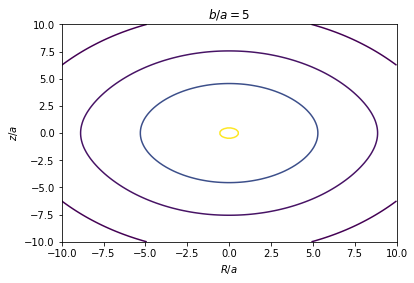

In [25]:
levels=10**np.linspace(np.log10(1.53e-07),np.log10(0.00058),7)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_ad(R_1,z_1,ba=5.),levels=levels)
plt.xlabel(r'$R/a$')
plt.ylabel(r'$z/a$')
plt.title(r'$b/a=5$')
#plt.colorbar(lm)
#plt.show()
plt.savefig('Miyamoto-NagaiEquipotentialb5.pdf')

In [80]:
from galpy import potential
from galpy.util import bovy_plot

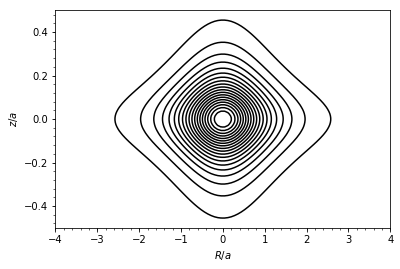

In [90]:
#amp=M*G
mnp= potential.MiyamotoNagaiPotential(amp=1.,a=1.,b=0.2)
mnp.plotDensity(justcontours=True,rmin=-4.,rmax=4.,nrs=100,nzs=100)
xlabel(r'$R/a$')
ylabel(r'$z/a$');

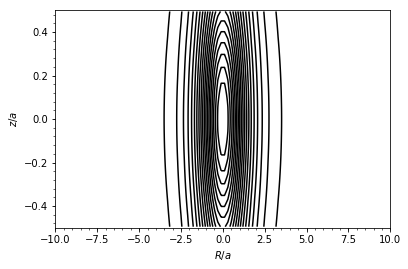

In [89]:
mnp= potential.MiyamotoNagaiPotential(amp=1.,a=1.,b=1.)
mnp.plotDensity(justcontours=True,rmin=-10.,rmax=10.,nrs=100,nzs=100)
xlabel(r'$R/a$')
ylabel(r'$z/a$');

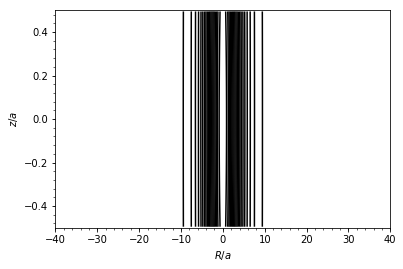

In [91]:
mnp= potential.MiyamotoNagaiPotential(amp=1.,a=1.,b=5.)
mnp.plotDensity(justcontours=True,rmin=-40.,rmax=40.,nrs=100,nzs=100)
xlabel(r'$R/a$')
ylabel(r'$z/a$');